In [34]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport

In [2]:
data = pd.read_csv('bureau.csv')
data.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


In [79]:
data[data['SK_ID_CURR']==100001]

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
248484,100001,5896630,Closed,currency 1,-857,0,-492.0,-553.0,NaN,0,112500.0,0.0,0.0,0.0,Consumer credit,-155,0.0
248485,100001,5896631,Closed,currency 1,-909,0,-179.0,-877.0,NaN,0,279720.0,0.0,0.0,0.0,Consumer credit,-155,0.0
248486,100001,5896632,Closed,currency 1,-879,0,-514.0,-544.0,NaN,0,91620.0,0.0,0.0,0.0,Consumer credit,-155,0.0
248487,100001,5896633,Closed,currency 1,-1572,0,-1329.0,-1328.0,NaN,0,85500.0,0.0,0.0,0.0,Consumer credit,-155,0.0
248488,100001,5896634,Active,currency 1,-559,0,902.0,NaN,NaN,0,337680.0,113166.0,0.0,0.0,Consumer credit,-6,4630.5
248489,100001,5896635,Active,currency 1,-49,0,1778.0,NaN,NaN,0,378000.0,373239.0,0.0,0.0,Consumer credit,-16,10822.5
248490,100001,5896636,Active,currency 1,-320,0,411.0,NaN,NaN,0,168345.0,110281.5,NaN,0.0,Consumer credit,-10,9364.5


In [6]:
des_data_bureau = pd.read_csv('HomeCredit_columns_description.csv')
des_data_bureau[122:138]

,Unnamed: 0,Table,Row,Description,Special
122,125,bureau.csv,SK_ID_CURR,ID of loan in our sample - one loan in our sam...,hashed
123,126,bureau.csv,SK_BUREAU_ID,Recoded ID of previous Credit Bureau credit re...,hashed
124,127,bureau.csv,CREDIT_ACTIVE,Status of the Credit Bureau (CB) reported credits,NaN
125,128,bureau.csv,CREDIT_CURRENCY,Recoded currency of the Credit Bureau credit,recoded
126,129,bureau.csv,DAYS_CREDIT,How many days before current application did c...,time only relative to the application
127,130,bureau.csv,CREDIT_DAY_OVERDUE,Number of days past due on CB credit at the ti...,NaN
128,131,bureau.csv,DAYS_CREDIT_ENDDATE,Remaining duration of CB credit (in days) at t...,time only relative to the application
129,132,bureau.csv,DAYS_ENDDATE_FACT,Days since CB credit ended at the time of appl...,time only relative to the application
130,133,bureau.csv,AMT_CREDIT_MAX_OVERDUE,Maximal amount overdue on the Credit Bureau cr...,NaN
131,134,bureau.csv,CNT_CREDIT_PROLONG,How many times was the Credit Bureau credit pr...,NaN


In [14]:
data.shape

(1716428, 17)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 17 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_CURR              int64  
 1   SK_ID_BUREAU            int64  
 2   CREDIT_ACTIVE           object 
 3   CREDIT_CURRENCY         object 
 4   DAYS_CREDIT             int64  
 5   CREDIT_DAY_OVERDUE      int64  
 6   DAYS_CREDIT_ENDDATE     float64
 7   DAYS_ENDDATE_FACT       float64
 8   AMT_CREDIT_MAX_OVERDUE  float64
 9   CNT_CREDIT_PROLONG      int64  
 10  AMT_CREDIT_SUM          float64
 11  AMT_CREDIT_SUM_DEBT     float64
 12  AMT_CREDIT_SUM_LIMIT    float64
 13  AMT_CREDIT_SUM_OVERDUE  float64
 14  CREDIT_TYPE             object 
 15  DAYS_CREDIT_UPDATE      int64  
 16  AMT_ANNUITY             float64
dtypes: float64(8), int64(6), object(3)
memory usage: 222.6+ MB


In [9]:
data.dtypes

SK_ID_CURR                  int64
SK_ID_BUREAU                int64
CREDIT_ACTIVE              object
CREDIT_CURRENCY            object
DAYS_CREDIT                 int64
CREDIT_DAY_OVERDUE          int64
DAYS_CREDIT_ENDDATE       float64
DAYS_ENDDATE_FACT         float64
AMT_CREDIT_MAX_OVERDUE    float64
CNT_CREDIT_PROLONG          int64
AMT_CREDIT_SUM            float64
AMT_CREDIT_SUM_DEBT       float64
AMT_CREDIT_SUM_LIMIT      float64
AMT_CREDIT_SUM_OVERDUE    float64
CREDIT_TYPE                object
DAYS_CREDIT_UPDATE          int64
AMT_ANNUITY               float64
dtype: object

In [11]:
data.nunique()

SK_ID_CURR                 305811
SK_ID_BUREAU              1716428
CREDIT_ACTIVE                   4
CREDIT_CURRENCY                 4
DAYS_CREDIT                  2923
CREDIT_DAY_OVERDUE            942
DAYS_CREDIT_ENDDATE         14096
DAYS_ENDDATE_FACT            2917
AMT_CREDIT_MAX_OVERDUE      68251
CNT_CREDIT_PROLONG             10
AMT_CREDIT_SUM             236708
AMT_CREDIT_SUM_DEBT        226537
AMT_CREDIT_SUM_LIMIT        51726
AMT_CREDIT_SUM_OVERDUE       1616
CREDIT_TYPE                    15
DAYS_CREDIT_UPDATE           2982
AMT_ANNUITY                 40321
dtype: int64

In [16]:
data.isnull().sum()

SK_ID_CURR                      0
SK_ID_BUREAU                    0
CREDIT_ACTIVE                   0
CREDIT_CURRENCY                 0
DAYS_CREDIT                     0
CREDIT_DAY_OVERDUE              0
DAYS_CREDIT_ENDDATE        105553
DAYS_ENDDATE_FACT          633653
AMT_CREDIT_MAX_OVERDUE    1124488
CNT_CREDIT_PROLONG              0
AMT_CREDIT_SUM                 13
AMT_CREDIT_SUM_DEBT        257669
AMT_CREDIT_SUM_LIMIT       591780
AMT_CREDIT_SUM_OVERDUE          0
CREDIT_TYPE                     0
DAYS_CREDIT_UPDATE              0
AMT_ANNUITY               1226791
dtype: int64

## Understanding of variables

CREDIT_ACTIVE - Current status of a Loan - Closed/ Active (2 values)

CREDIT_CURRENCY - Currency in which the transaction was executed - Currency1, Currency2, Currency3, Currency4 ( 4 values)

CREDIT_DAY_OVERDUE - Number of overdue days

CREDIT_TYPE - Consumer Credit, Credit card, Mortgage, Car loan, Microloan, Loan for working capital replemishment, Loan for Business development, Real estate loan, Unkown type of laon, Another type of loan. Cash loan, Loan for the purchase of equipment, Mobile operator loan, Interbank credit, Loan for purchase of shares ( 15 values )

DAYS_CREDIT - Number of days ELAPSED since customer applied for CB credit with respect to current application Interpretation - Are these loans evenly spaced time intervals? Are they concentrated within a same time frame?

DAYS_CREDIT_ENDDATE - Number of days the customer CREDIT is valid at the time of application 

CREDIT_DAY_OVERDUE - Number of days the customer CREDIT is past the end date at the time of application

AMT_CREDIT_SUM - Total available credit for a customer 

AMT_CREDIT_SUM_DEBT - Total amount yet to be repayed 

AMT_CREDIT_SUM_DEBT - Total amount yet to be repayed

AMT_CREDIT_SUM_LIMIT - Current Credit that has been utilized 

AMT_CREDIT_SUM_OVERDUE - Current credit payment that is overdue 

CNT_CREDIT_PROLONG - How many times was the Credit date prolonged

## NOTE:
For a given loan transaction 'AMT_CREDIT_SUM' = 'AMT_CREDIT_SUM_DEBT' +'AMT_CREDIT_SUM_LIMIT'

AMT_ANNUITY - Annuity of the Credit Bureau data 

DAYS_CREDIT_UPDATE - Number of days before current application when last CREDIT UPDATE was received 

DAYS_ENDDATE_FACT - Days since CB credit ended at the time of application 

AMT_CREDIT_MAX_OVERDUE - Maximum Credit amount overdue at the time of application

In [17]:
def missing_data(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

In [18]:
missing_data(data)

,Total,Percent
AMT_ANNUITY,1226791,71.473490
AMT_CREDIT_MAX_OVERDUE,1124488,65.513264
DAYS_ENDDATE_FACT,633653,36.916958
AMT_CREDIT_SUM_LIMIT,591780,34.477415
AMT_CREDIT_SUM_DEBT,257669,15.011932
DAYS_CREDIT_ENDDATE,105553,6.149573
AMT_CREDIT_SUM,13,0.000757
CREDIT_ACTIVE,0,0.000000
CREDIT_CURRENCY,0,0.000000
DAYS_CREDIT,0,0.000000


In [83]:
grp_credit_active = data['CREDIT_ACTIVE'].value_counts().reset_index()
grp_credit_active.columns = ['status', 'amt']
# grp_credit_active

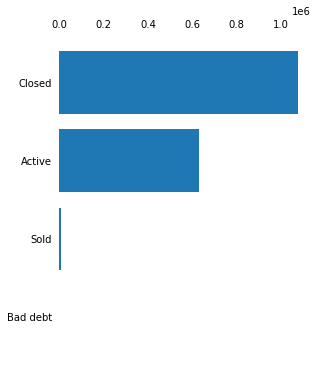

In [57]:
fig, ax = plt.subplots(figsize =(4.5,6))
ax.barh(grp_credit_active.status, grp_credit_active.amt, height=0.8)

lst = ['left', 'right', 'bottom', 'top'] # bỏ các khung xung quanh 
for i in lst:
    ax.spines[i].set_visible(False)
    
ax.xaxis.tick_top()
ax.tick_params(left= False, top= False)
ax.invert_yaxis()

In [82]:
grp_credit_currency = data['CREDIT_CURRENCY'].value_counts().reset_index()
grp_credit_currency.columns = ['type_of_currency', 'amt']
# grp_credit_currency

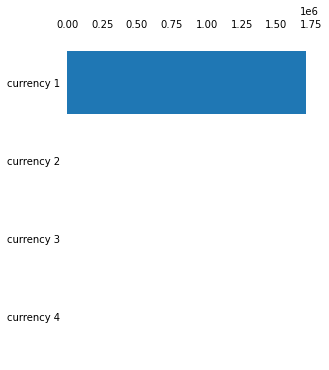

In [61]:
fig, ax = plt.subplots(figsize =(4.5,6))
ax.barh(grp_credit_currency.type_of_currency, grp_credit_currency.amt,height=0.8)

lst = ['left', 'right', 'bottom', 'top'] # bỏ các khung xung quanh 
for i in lst:
    ax.spines[i].set_visible(False)
    
ax.xaxis.tick_top()
ax.tick_params(left= False, top= False)
ax.invert_yaxis()

In [81]:
grp_credit_type = data['CREDIT_TYPE'].value_counts().reset_index()
grp_credit_type.columns = ['type_of_credit', 'amt']
# grp_credit_type

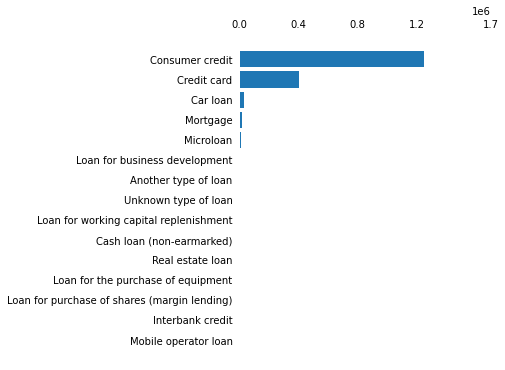

In [53]:
fig, ax = plt.subplots(figsize =(4.5,6))
ax.barh(grp_credit_type.type_of_credit, grp_credit_type.amt, height=0.8)

lst = ['left', 'right', 'bottom', 'top'] # bỏ các khung xung quanh 
for i in lst:
    ax.spines[i].set_visible(False)
    
ax.set_xticks([0,400000,800000,1200000,1700000])
ax.xaxis.tick_top()
ax.tick_params(left= False, top= False)
ax.invert_yaxis()

# Number of past loans per customer

In [74]:
data[['SK_ID_CURR', 'DAYS_CREDIT']]

,SK_ID_CURR,DAYS_CREDIT
0,215354,-497
1,215354,-208
2,215354,-203
3,215354,-203
4,215354,-629
...,...,...
1716423,259355,-44
1716424,100044,-2648
1716425,100044,-1809
1716426,246829,-1878


In [86]:
grp = data[['SK_ID_CURR', 'DAYS_CREDIT']].groupby('SK_ID_CURR')['DAYS_CREDIT'].count().reset_index()
grp.columns = ['SK_ID_CURR','num_of_past_loans']
grp

,SK_ID_CURR,num_of_past_loans
0,100001,7
1,100002,8
2,100003,4
3,100004,2
4,100005,3
...,...,...
305806,456249,13
305807,456250,3
305808,456253,4
305809,456254,1


In [87]:
# VÍ DỤ: trong quá khứ thì thằng 1000001 có 7 cái past loan

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


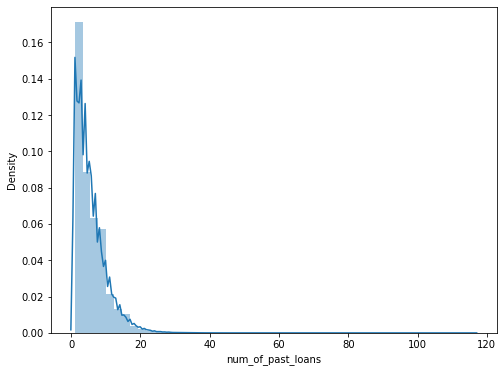

In [89]:
plt.figure(figsize=(8,6))
sns.distplot(grp.num_of_past_loans)
plt.show()

# Number of types of past loans per customer

In [77]:
data[['SK_ID_CURR','CREDIT_TYPE']]

,SK_ID_CURR,CREDIT_TYPE
0,215354,Consumer credit
1,215354,Credit card
2,215354,Consumer credit
3,215354,Credit card
4,215354,Consumer credit
...,...,...
1716423,259355,Microloan
1716424,100044,Consumer credit
1716425,100044,Consumer credit
1716426,246829,Consumer credit


In [90]:
grp_num_of_type = data[['SK_ID_CURR','CREDIT_TYPE']].groupby('SK_ID_CURR').nunique().reset_index()
grp_num_of_type.columns = ['SK_ID_CURR', 'num_of_credit_type']
grp_num_of_type

,SK_ID_CURR,num_of_credit_type
0,100001,1
1,100002,2
2,100003,2
3,100004,1
4,100005,2
...,...,...
305806,456249,3
305807,456250,2
305808,456253,2
305809,456254,1


In [91]:
# VÍ DỤ: trong 7 cái past loan của 100001 đấy thì chỉ cùng 1 loại thôi


/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


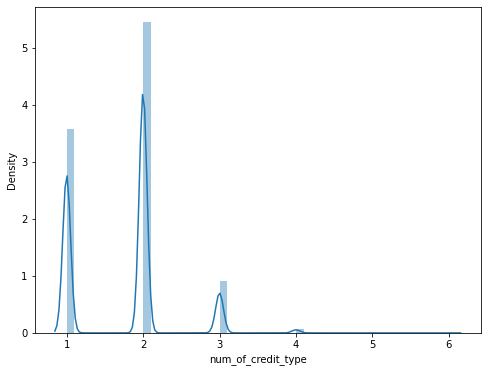

In [92]:
plt.figure(figsize=(8,6))
sns.distplot(grp_num_of_type.num_of_credit_type)
plt.show()

In [85]:
# phân bố chủ yếu sẽ là 2 loại

# % of active loans per customer 

In [105]:
data['CREDIT_ACTIVE_BINARY'] = data['CREDIT_ACTIVE']

def check(status):
    if status == 'Closed':
        result = 0
    else:
        result = 1 
    return result

data['CREDIT_ACTIVE_BINARY'] = data.apply(lambda x: check(x.CREDIT_ACTIVE), axis = 1)

grp_atv_loans = data.groupby(by = ['SK_ID_CURR'])['CREDIT_ACTIVE_BINARY'].mean().reset_index().rename(index=str, columns={'CREDIT_ACTIVE_BINARY': 'ACTIVE_LOANS_PERCENTAGE'})
grp_atv_loans

,SK_ID_CURR,ACTIVE_LOANS_PERCENTAGE
0,100001,0.428571
1,100002,0.250000
2,100003,0.250000
3,100004,0.000000
4,100005,0.666667
...,...,...
305806,456249,0.153846
305807,456250,0.666667
305808,456253,0.500000
305809,456254,0.000000


Ví dụ thằng 100001 có 7 cái past loan và trong đó có 3 cái active

=> active loan percentage của n sẽ là 0.4

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


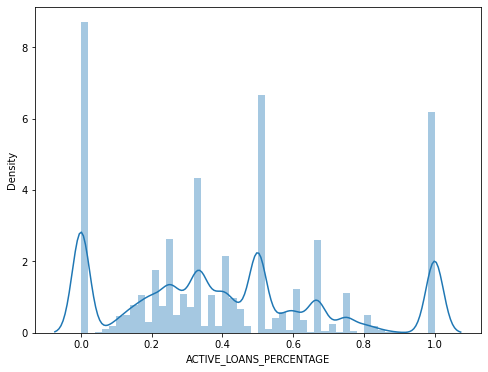

In [106]:
plt.figure(figsize=(8,6))
sns.distplot(grp_atv_loans.ACTIVE_LOANS_PERCENTAGE)
plt.show()

In [112]:
# grp = data[['SK_ID_CURR', 'DAYS_CREDIT']].groupby(by = ['SK_ID_CURR']).apply(lambda x: x.sort_values(['DAYS_CREDIT'], ascending = False))
# grp

# % of loans per customer where end date for credit is past 

In [120]:
data[data['SK_ID_CURR'] == 100004]

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY,CREDIT_ACTIVE_BINARY,CREDIT_ENDDATE_BINARY
363104,100004,6829133,Closed,currency 1,-1326,0,-595.0,-683.0,NaN,0,94500.0,0.0,0.0,0.0,Consumer credit,-682,NaN,0,0
363105,100004,6829134,Closed,currency 1,-408,0,-382.0,-382.0,0.0,0,94537.8,0.0,0.0,0.0,Consumer credit,-382,NaN,0,0


In [118]:
data['CREDIT_ENDDATE_BINARY'] = data['DAYS_CREDIT_ENDDATE']

def f(x):
    if x<0:
        y = 0
    else:
        y = 1   
    return y

data['CREDIT_ENDDATE_BINARY'] = data.apply(lambda x: f(x.DAYS_CREDIT_ENDDATE), axis = 1)
print("New Binary Column calculated")

grp = data.groupby(by = ['SK_ID_CURR'])['CREDIT_ENDDATE_BINARY'].mean().reset_index().rename(index=str, columns={'CREDIT_ENDDATE_BINARY': 'CREDIT_ENDDATE_PERCENTAGE'})
grp

New Binary Column calculated


,SK_ID_CURR,CREDIT_ENDDATE_PERCENTAGE
0,100001,0.428571
1,100002,0.625000
2,100003,0.250000
3,100004,0.000000
4,100005,0.666667
...,...,...
305806,456249,0.153846
305807,456250,0.666667
305808,456253,0.500000
305809,456254,0.000000


/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


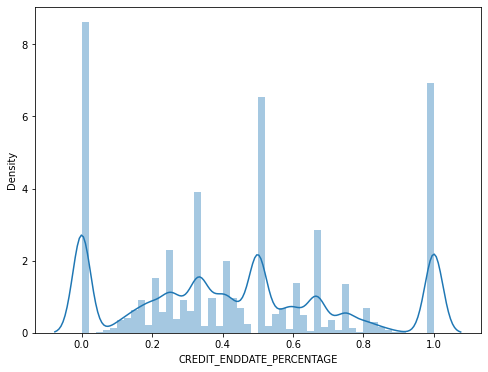

In [121]:
plt.figure(figsize=(8,6))
sns.distplot(grp.CREDIT_ENDDATE_PERCENTAGE)
plt.show()

In [119]:
data.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY,CREDIT_ACTIVE_BINARY,CREDIT_ENDDATE_BINARY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN,0,0
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN,1,1
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN,1,1
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN,1,1
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN,1,1


# PROFILE REPORT 

In [36]:
report = ProfileReport(data, minimal=True)
report.to_notebook_iframe()
report.to_file("report.html", silent=False)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]